# 非平衡分类

In [1]:
import numpy as np
from sklearn.datasets import *
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

D:\study\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 准备数据

In [2]:
dataSet = make_classification(n_classes=2, n_clusters_per_class=1, n_features=4, n_samples=1000, random_state=1, weights=[0.9, 0.1])
X, Y = dataSet[0], dataSet[1]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1)

## 构建模型

In [3]:
logis_model = LogisticRegression(n_jobs=4)
logis_model.fit(train_x, train_y)
y_pred = logis_model.predict(test_x)
result = accuracy_score(y_pred, test_y)
result

D:\study\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))


0.96

logistic分类正确率达到95%并不能说明性能很好,因为反例数目太少,即使把反例分成正例,错误率也不会下降太多;此时要用到ROC,用AUG评判非平衡分类模型的性能

## 绘制ROC

ROC曲线的绘制方法：假设有P个正例，N个反例，首先拿到分类器对于测试集中每个样本预测为正例的概率，根据概率对所有样本进行逆序排列，然后将分类阈值设为最大，即把所有样本均预测为反例，此时图上的点为 (0,0)。然后将分类阈值依次设为每个样本的预测概率，即依次将每个样本划分为正例，如果该样本为真正例，则TP+1，即TPR + 1/P ; 如果该样本为负例，则FP+1，即FPR + 1/N。最后的到所有样本点的TPR和FPR值，用线段相连

数目少的样本视为正例,根据逻辑斯蒂回归的特点,要得到预测概率,以类别1作为正例;
sklearn中的logistic regression对每个样本的预测概率包含各个类别的概率

AUC: 0.5579


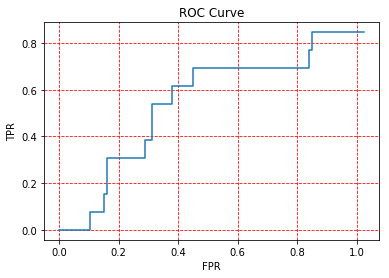

In [5]:
def plot_ROC(classification_model):
    probs = classification_model.predict_proba(test_x)[:, 1]   #得到每个样本预测为1的概率
    probs = sorted(probs, reverse=True)
    num_feat = len(train_x[0])
    num_pos = sum(test_y)
    num_neg = len(test_y) - num_pos
    
    FPR = [0] ; TPR = [0]
    tpr = 0; AUC = 0
    
    for i in range(0, len(test_y)):
        if classification_model.predict(test_x[i].reshape(-1, num_feat)) == 1:
            TPR.append(TPR[-1] + 1 / num_pos)
            FPR.append(FPR[-1])
            tpr += 1 / num_pos
        else:
            FPR.append(FPR[-1] + 1 / num_neg)
            TPR.append(TPR[-1])
            AUC += tpr * 1 / num_neg
        
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.grid(color='r',linestyle='--')    #修改网格颜色，类型为虚
    plt.plot(FPR, TPR)
    
    print('AUC: %0.4f' %AUC)
    
    return

plot_ROC(logis_model)

为什么到不了(1,1)?

AUC = 0.5579,Logisti Regression对于非平衡二分类问题效果不理想,几乎是在蒙